# Midterm exam solution
## Question 2

### **1.- Preprocessing**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
np.random.seed(0)

After run all 1_midterm notebook, we read the .csv file created.

In [2]:
file_path = 'auto_data.csv'
df = pd.read_csv(file_path)
df = df.loc[:,df.columns != 'Unnamed: 0']
X = df.drop('mpg01', axis=1)
y = df.loc[:,['mpg01']]
X.sample(random_state=0)

,displacement,weight
144,90.0,2125


Since SVMs are sensitive to the feature scales we transform our data set.

In [3]:
X = X.to_numpy()
X = StandardScaler().fit_transform(X)
y = y.to_numpy().astype(np.float64).ravel()

### **2.- Item (b)**

In [4]:
import time
import warnings
warnings.filterwarnings("ignore")

from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

As we are going to work with cross validation, we fix the K-Flod in order to apply the same for all our searches.

In [5]:
cv = KFold(n_splits=5, random_state=0)

Now we fit a support vector classifier with various values of **C** parameter and report our findings.

In [6]:
C = np.linspace(0.0001, 100, 40)

param_grid = {
    'C': C,
    'kernel': ['linear'],
}

linear_grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
stime = time.time()
linear_grid.fit(X, y)
sec = time.time() - stime
print("Time for linear fitting: %2d min. %2d sec." % (sec/60, sec%60))
print("The parameter of the best estimator is %s \nThe score of the best estimator is %0.3f"
      % (linear_grid.best_params_, linear_grid.best_score_))
report = pd.DataFrame(linear_grid.cv_results_).sort_values(by='mean_test_score', ascending=False)
report.head(3)

Time for linear fitting:  0 min.  1 sec.
The parameter of the best estimator is {'C': 2.5642, 'kernel': 'linear'} 
The score of the best estimator is 0.875


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
20,0.006867,0.001902,0.000837,0.000039,51.2821,linear,"{'C': 51.2821, 'kernel': 'linear'}",0.898734,0.860759,0.923077,...,0.875,0.030748,1,0.904153,0.913738,0.894904,0.914013,0.894904,0.904343,0.008485
1,0.001879,0.000116,0.000589,0.000018,2.5642,linear,"{'C': 2.5642, 'kernel': 'linear'}",0.898734,0.860759,0.923077,...,0.875,0.030748,1,0.904153,0.910543,0.894904,0.914013,0.894904,0.903704,0.007850
22,0.006865,0.001041,0.000904,0.000066,56.4103,linear,"{'C': 56.4103, 'kernel': 'linear'}",0.898734,0.860759,0.923077,...,0.875,0.030748,1,0.904153,0.913738,0.894904,0.914013,0.894904,0.904343,0.008485


### **3.- Item (c)**

Now we repeat item (b) this time using SVMs with **polynomial kernel** and report it.

In [7]:
C = np.linspace(0.0001, 100, 3)
gamma = np.linspace(0.001, 10, 3)

param_grid = {
    'C': C,
    'gamma' : gamma,
    'degree': [2,3],
    'kernel': ['poly'],
}

poly_grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
stime = time.time()
poly_grid.fit(X, y)
sec = time.time() - stime
print("Time for polynomial fitting: %2d min. %2d sec." % (sec/60, sec%60))
print("The parameters of the best estimator are %s \nThe score of the best estimator is %0.3f"
      % (poly_grid.best_params_, poly_grid.best_score_))
report = pd.DataFrame(poly_grid.cv_results_).sort_values(by='mean_test_score', ascending=False)
report.head(3)

Time for polynomial fitting:  2 min. 54 sec.
The parameters of the best estimator are {'C': 0.0001, 'degree': 3, 'gamma': 10.0, 'kernel': 'poly'} 
The score of the best estimator is 0.798


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
5,0.002463,0.000223,0.000793,0.000067,0.0001,3,10,poly,"{'C': 0.0001, 'degree': 3, 'gamma': 10.0, 'ker...",0.936709,...,0.798469,0.136515,1,0.837061,0.859425,0.808917,0.853503,0.866242,0.845030,0.020477
17,13.100780,8.309501,0.033513,0.065256,100,3,10,poly,"{'C': 100.0, 'degree': 3, 'gamma': 10.0, 'kern...",0.848101,...,0.778061,0.106044,2,0.862620,0.894569,0.815287,0.866242,0.859873,0.859718,0.025455
11,6.336098,5.112961,0.000854,0.000032,50.0001,3,10,poly,"{'C': 50.00005, 'degree': 3, 'gamma': 10.0, 'k...",0.848101,...,0.778061,0.106044,2,0.856230,0.894569,0.818471,0.866242,0.859873,0.859077,0.024366


Once again we perform the same task, but this time using SVMs with **radial basis function kernel**.

In [8]:
C = np.linspace(0.0001, 100, 200)
gamma = np.linspace(0.001, 10, 40)

param_grid = {
    'C': C,
    'gamma' : gamma,
    'kernel': ['rbf'],
}

rbf_grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
stime = time.time()
rbf_grid.fit(X, y)
sec = time.time() - stime
print("Time for rbf fitting: %2d min. %2d sec." % (sec/60, sec%60))
print("The parameters of the best estimator are %s \nThe score of the best estimator is %0.3f"
      % (rbf_grid.best_params_, rbf_grid.best_score_))
report = pd.DataFrame(rbf_grid.cv_results_).sort_values(by='mean_test_score', ascending=False)
report.head(3)

Time for rbf fitting:  7 min. 40 sec.
The parameters of the best estimator are {'C': 78.89449346733669, 'gamma': 0.2573846153846154, 'kernel': 'rbf'} 
The score of the best estimator is 0.890


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
7481,0.006537,0.001071,0.000923,0.000043,93.9699,0.257385,rbf,"{'C': 93.9698552763819, 'gamma': 0.25738461538...",0.911392,0.860759,...,0.890306,0.020568,1,0.904153,0.920128,0.901274,0.920382,0.910828,0.911353,0.007902
7441,0.006329,0.000863,0.000918,0.000038,93.4673,0.257385,rbf,"{'C': 93.46734321608041, 'gamma': 0.2573846153...",0.911392,0.860759,...,0.890306,0.020568,1,0.904153,0.920128,0.901274,0.920382,0.910828,0.911353,0.007902
6281,0.006196,0.001021,0.000930,0.000053,78.8945,0.257385,rbf,"{'C': 78.89449346733669, 'gamma': 0.2573846153...",0.911392,0.860759,...,0.890306,0.020568,1,0.904153,0.923323,0.901274,0.917197,0.904459,0.910081,0.008606


### **4.- Item (d)**

Now we make a plot for every best estimator found in each search:

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

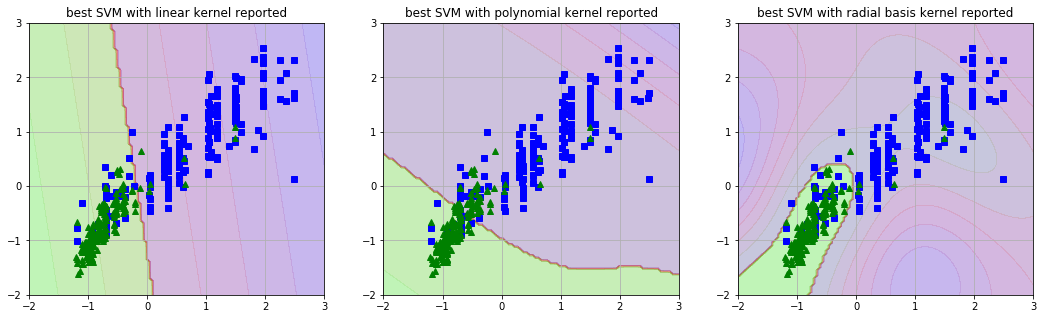

In [10]:
fig_svms, axs = plt.subplots(1,3, figsize=(18,5))

estimators = [
    linear_grid.best_estimator_,
    poly_grid.best_estimator_,
    rbf_grid.best_estimator_
]

titles = [
    "best SVM with linear kernel reported",
    "best SVM with polynomial kernel reported",
    "best SVM with radial basis kernel reported"
]

axes = [-2, 3, -2, 3]
x0s = np.linspace(axes[0], axes[1], 100)
x1s = np.linspace(axes[2], axes[3], 100)
x0, x1 = np.meshgrid(x0s, x1s)
X_grid = np.c_[x0.ravel(), x1.ravel()]

for estimator, ax, title in zip(estimators, axs.flatten(), titles):

    ax.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    ax.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    ax.axis(axes)
    ax.grid(True, which='both')
    ax.set_title(title)
    
    y_pred = estimator.predict(X_grid).reshape(x0.shape)
    y_decision = estimator.decision_function(X_grid).reshape(x0.shape)
    ax.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    ax.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    
plt.show()

### **5.- Conclusion**

Accoring to our score reports, the best estimator was the **SVM with radial basis kernel**, the second best was the *SVM with lineal kernel* and the worst was the *SVM with polynomial kernel*. We can back up these assertions in the plots above as the high gas mileage region of the best **SVM with radial basis kernel** plot seems to be more fitting.